# **Análisis Descriptivo y Visualización del Sector Industrial de Tierra del Fuego**


## **Objetivo**

Este primer análisis tiene como objetivo proporcionar una comprensión completa de los datos relacionados con la industria en Tierra del Fuego a través de estadísticas descriptivas y visualizaciones. Esto servirá como una base sólida para los modelos de aprendizaje automático que se desarrollarán posteriormente.


## **Importar Librerías y Cargar Datos**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Cargar los datasets usando los enlaces directos a los archivos CSV con codificación 'latin1' y el delimitador correcto
personal_activo_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Personal_Activo_Industria.csv', encoding='latin1', delimiter=';')
establecimientos_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Establecimientos_industriales.csv', encoding='latin1', delimiter=';')
produccion_confeccionista_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Confeccionista.csv', encoding='latin1', delimiter=';')
produccion_electronica_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Electronica.csv', encoding='latin1', delimiter=';')
produccion_pesquera_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Pesquera.csv', encoding='latin1', delimiter=';')
produccion_textil_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Textil.csv', encoding='latin1', delimiter=';')
produccion_plastica_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Plastica.csv', encoding='latin1', delimiter=';')
produccion_otros_df = pd.read_csv('https://raw.githubusercontent.com/monopologit/Aprendizaje2024/master/data/raw/Produccion_Industrial_Otros.csv', encoding='latin1', delimiter=';')


## **Limpiar y Preprocesar los Datos**

En esta sección, eliminaremos espacios en blanco en los nombres de las columnas y convertiremos los nombres de los meses en español a números. También manejaremos valores faltantes reemplazándolos con ceros.


In [ ]:
# Limpiar los nombres de las columnas eliminando espacios en blanco extra
for df in [personal_activo_df, establecimientos_df, produccion_confeccionista_df, produccion_electronica_df,
           produccion_pesquera_df, produccion_textil_df, produccion_plastica_df, produccion_otros_df]:
    df.columns = df.columns.str.strip()

# Diccionario para convertir los nombres de los meses en español a números
meses = {
    'Enero': '01', 'enero': '01', 'Febrero': '02', 'febrero': '02', 'Marzo': '03', 'marzo': '03',
    'Abril': '04', 'abril': '04', 'Mayo': '05', 'mayo': '05', 'Junio': '06', 'junio': '06',
    'Julio': '07', 'julio': '07', 'Agosto': '08', 'agosto': '08', 'Septiembre': '09', 'septiembre': '09',
    'Octubre': '10', 'octubre': '10', 'Noviembre': '11', 'noviembre': '11', 'Diciembre': '12', 'diciembre': '12'
}

# Función para reemplazar los nombres de los meses en español por números y manejar NaN
def convertir_fecha(row):
    if pd.isna(row['Año']) or pd.isna(row['Mes']):
        return pd.NaT
    año = str(int(row['Año']))
    mes = str(row['Mes']).strip()
    mes = meses.get(mes, '01')  # Asignar '01' como valor predeterminado si el mes no se encuentra en el diccionario
    return pd.to_datetime(f'{año}-{mes}', format='%Y-%m')

# Aplicar la función para crear la columna 'Fecha' en cada dataset
for df in [personal_activo_df, establecimientos_df, produccion_confeccionista_df, produccion_electronica_df,
           produccion_pesquera_df, produccion_textil_df, produccion_plastica_df, produccion_otros_df]:
    df['Fecha'] = df.apply(convertir_fecha, axis=1)

# Establecer la columna 'Fecha' como el índice para todos los datasets
for df in [personal_activo_df, establecimientos_df, produccion_confeccionista_df, produccion_electronica_df,
           produccion_pesquera_df, produccion_textil_df, produccion_plastica_df, produccion_otros_df]:
    df.set_index('Fecha', inplace=True)

# Manejar valores faltantes reemplazando NaN con 0
for df in [personal_activo_df, establecimientos_df, produccion_confeccionista_df, produccion_electronica_df,
           produccion_pesquera_df, produccion_textil_df, produccion_plastica_df, produccion_otros_df]:
    df.fillna(0, inplace=True)

# Crear una columna 'Total' sumando las columnas existentes en personal_activo_df
personal_activo_df['Total'] = personal_activo_df[['Confeccionistas', 'Electrónicas', 'Plásticas', 'Textiles', 'Pesqueras', 'Otras']].sum(axis=1)


## **Estadísticas Descriptivas**

A continuación, mostramos las estadísticas descriptivas de cada uno de los datasets para proporcionar una visión general de los datos.


In [ ]:
print("Estadísticas Descriptivas de Personal Activo en Establecimientos Industriales")
print(personal_activo_df.describe())
print("\nEstadísticas Descriptivas de Establecimientos Industriales")
print(establecimientos_df.describe())
print("\nEstadísticas Descriptivas de Producción Industrial Confeccionista")
print(produccion_confeccionista_df.describe())
print("\nEstadísticas Descriptivas de Producción Industrial Electrónica")
print(produccion_electronica_df.describe())
print("\nEstadísticas Descriptivas de Producción Industrial Pesquera")
print(produccion_pesquera_df.describe())
print("\nEstadísticas Descriptivas de Producción Industrial Textil")
print(produccion_textil_df.describe())
print("\nEstadísticas Descriptivas de Producción Industrial Plástica")
print(produccion_plastica_df.describe())
print("\nEstadísticas Descriptivas de Producción Industrial Otros")
print(produccion_otros_df.describe())


Estadísticas Descriptivas de Personal Activo en Establecimientos Industriales
               Año  Confeccionistas  Electrónicas   Plásticas    Textiles  \
count   288.000000       288.000000    288.000000  288.000000  288.000000   
mean   1984.388889       411.135417      6.397694  642.027778  578.840278   
std     236.011489       148.665231      3.484517  169.477222  145.714444   
min       0.000000         0.000000      0.000000    0.000000    0.000000   
25%    2006.000000       300.000000      3.366000  634.250000  557.750000   
50%    2012.000000       393.000000      6.271000  705.500000  623.000000   
75%    2018.000000       526.500000      9.171750  741.000000  660.000000   
max    2024.000000       767.000000     13.820000  838.000000  776.000000   

        Pesqueras       Otras  Unnamed: 8  Unnamed: 9        Total  
count  288.000000  288.000000       288.0       288.0   288.000000  
mean   377.572917  302.104167         0.0         0.0  2318.078250  
std    134.980660  17

## **Visualización de Datos**

En esta sección, graficamos la evolución del personal activo, el número de establecimientos industriales y la producción de productos específicos a lo largo del tiempo.


### **Evolución del Personal Activo en la Industria por Rama de Actividad**


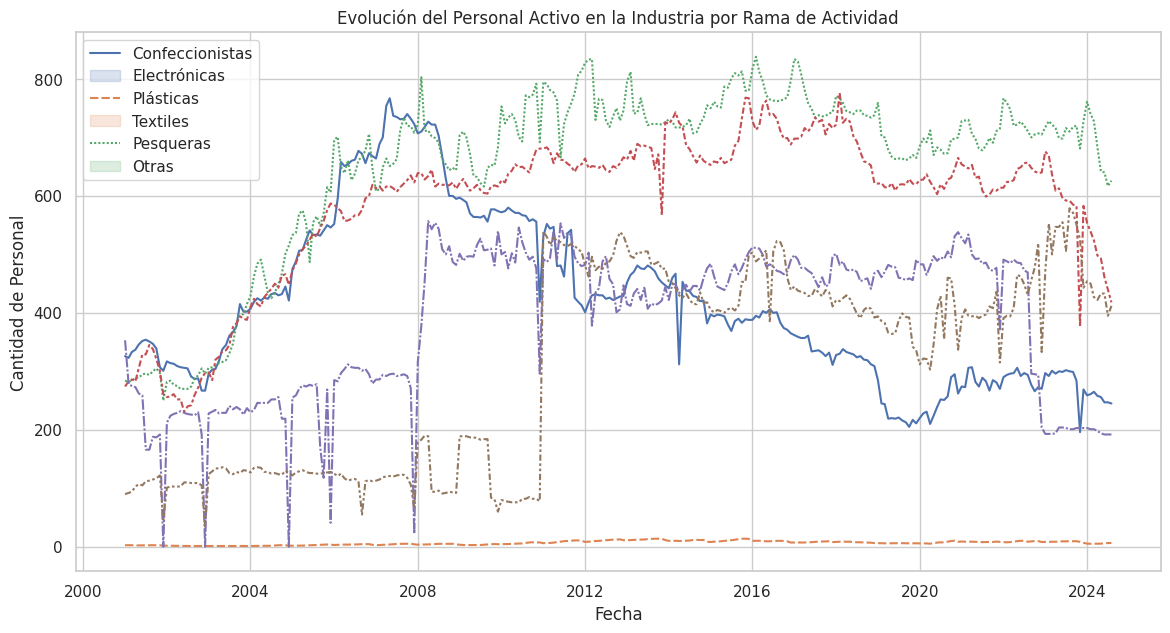

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=personal_activo_df[['Confeccionistas', 'Electrónicas', 'Plásticas', 'Textiles', 'Pesqueras', 'Otras']])
plt.title('Evolución del Personal Activo en la Industria por Rama de Actividad')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Personal')
plt.legend(labels=['Confeccionistas', 'Electrónicas', 'Plásticas', 'Textiles', 'Pesqueras', 'Otras'])
plt.show()


### **Evolución del Número de Establecimientos Industriales por Rama de Actividad**


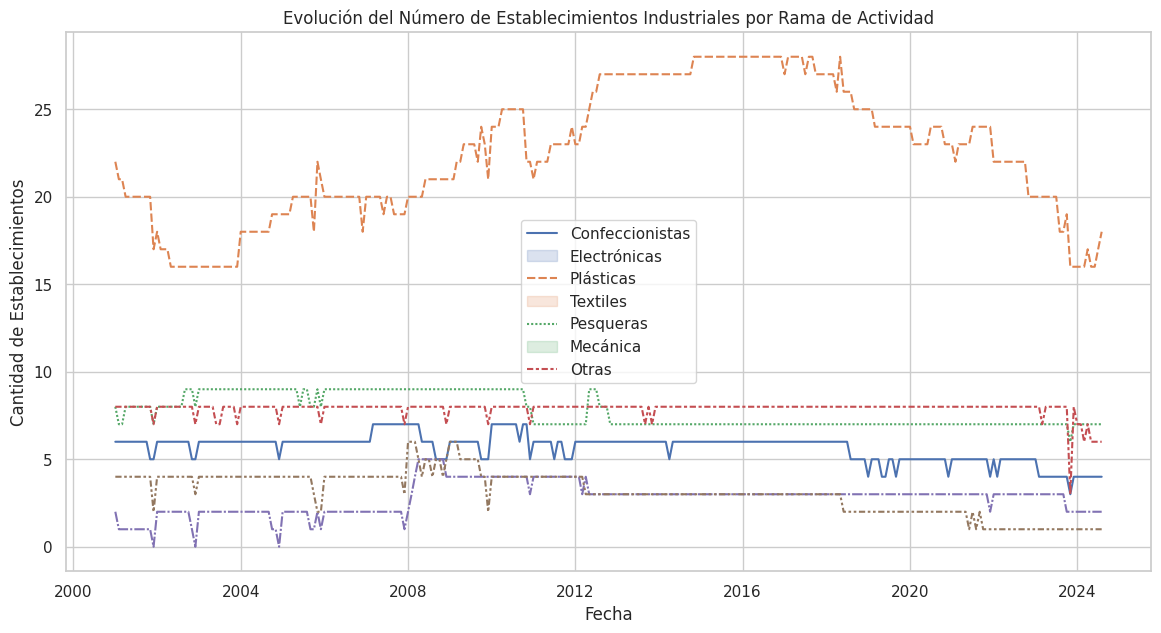

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=establecimientos_df[['Confeccionistas', 'Electrónicas', 'Plásticas', 'Textiles', 'Pesqueras', 'Mecánica', 'Otras']])
plt.title('Evolución del Número de Establecimientos Industriales por Rama de Actividad')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Establecimientos')
plt.legend(labels=['Confeccionistas', 'Electrónicas', 'Plásticas', 'Textiles', 'Pesqueras', 'Mecánica', 'Otras'])
plt.show()


### Producción de Televisores en el Sector Electrónico a lo Largo del Tiempo
Se pueden mostrar muchos ejemplos pero por ser parte del sector industrial de las electrónicas, se elije este ejemplo.

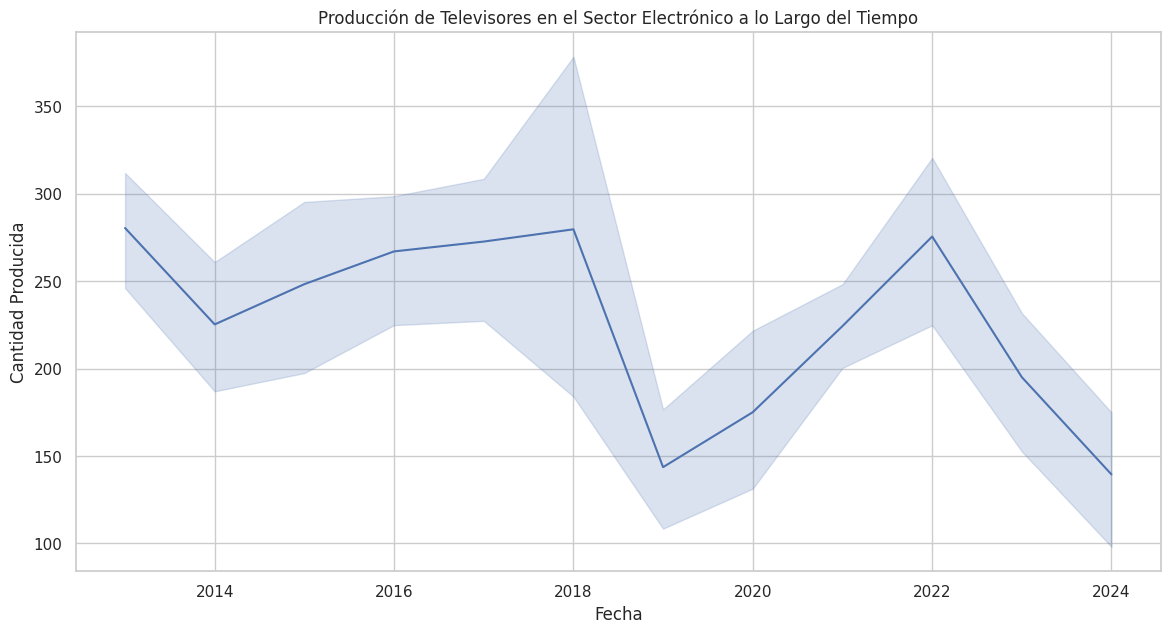

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=produccion_electronica_df['Televisor'])
plt.title('Producción de Televisores en el Sector Electrónico a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Producida')
plt.show()